In [14]:
import numpy as np
import PyPDF2
import docx2txt
import sys

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [16]:
def readDoc():
    name = "/content/text.txt"
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    print(choice)        
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

In [17]:
def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [18]:
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

1
<class 'str'>
The length of the file is: 2767


In [19]:
sentences_list = tokenize(document)

# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 280
The size of the item 0 in Bytes is: 202


In [20]:
print(type(sentences_list))
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))


<class 'list'>
The size of the list "sentences" is: 19


In [21]:
for i in sentences_list:
    print(i)

Short stories date back to oral storytelling traditions which originally produced epics such as the Ramayana, the Mahabharata, Homer's Iliad and Odyssey.
Oral narratives were often told in the form of rhyming or rhythmic verse, often including recurring sections or, in the case of Homer, Homeric epithets.
Such stylistic devices often acted as mnemonics for easier recall, rendition, and adaptation of the story.
Short sections of verse might focus on individual narratives that could be told at one sitting.
The overall arc of the tale would emerge only through the telling of multiple such sections.
The other ancient form of a short story, the anecdote, was popular under the Roman Empire.
Anecdotes functioned as a sort of parable, a brief realistic narrative that embodies a point.
Many surviving Roman anecdotes were collected in the 13th or 14th century as the Gesta Romanorum.
Anecdotes remained popular in Europe well into the 18th century, when the fictional anecdotal letters of Sir Roger

In [22]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [23]:
cv_demo = CountVectorizer() # a demo object of class CountVectorizer

# I have repeated the words to make a non-ambiguous array of the document text matrix 

text_demo = ["Ashish is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))

# Result is 2-d matrix containing document text matrix
# Notice that in the second row, there is 2.
# also, bad is repeated twice in that sentence.
# so we can infer that 2 is corresponding to the word 'bad'
print('Feature list: {}'.format(cv_demo.get_feature_names()))

Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 0]]
Feature list: ['am', 'are', 'ashish', 'bad', 'good', 'is', 'not', 'you']


In [24]:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse.csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <19x226 sparse matrix of type '<class 'numpy.int64'>'
	with 380 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 56
['12', '13th', '14th', '1690s', '16th', '1704', '1710', '17th', '18th', 'acted', 'adaptation', 'adopted', 'all', 'although', 'an', 'ancient', 'and', 'anecdotal', 'anecdote', 'anecdotes', 'another', 'antoine', 'appearance', 'appeared', 'arabian', 'arc', 'are', 'as', 'at', 'authors', 'back', 'bandello', 'be', 'began', 'births', 'boccaccio', 'body', 'books', 'both', 'brief', 'buddha', 'by', 'canterbury', 'case', 'century', 'charles', 'chaucer', 'collected', 'collection', 'collections', 'compilation', 'compiled', 'composed', 'concerning', 'could', 'coverley', 'crafted', 'darkly', 'date', 'de', 'decameron', 'develop', 'development', 'device', 'devices', 'diderot', 'early', 'easier', 'embodies', 'emerge', 'empire', 'end', 'enormous', 

In [25]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.16584882 0.         0.         ... 0.14548723 0.         0.        ]]


<bound method _cs_matrix.toarray of <226x19 sparse matrix of type '<class 'numpy.float64'>'
	with 380 stored elements in Compressed Sparse Column format>>


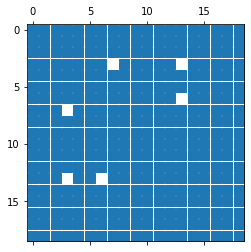

In [26]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
plt.spy(res_graph)

Number of edges 187
Number of vertices 19


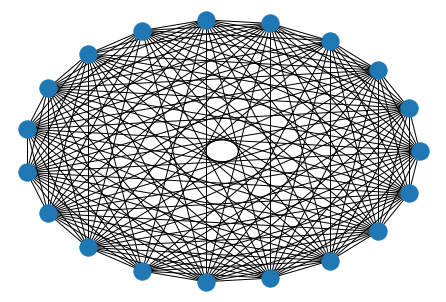

The memory used by the graph in Bytes is: 56


In [27]:
nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [28]:
ranks = nx.pagerank(nx_graph)
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))
for i in ranks:
    print(i, ranks[i])

<class 'dict'>
The size used by the dictionary in Bytes is: 648
0 0.04962440489369443
1 0.05687076688392503
2 0.04775200054115088
3 0.04359810144033254
4 0.05253696030832323
5 0.05726376689872146
6 0.04119023979414585
7 0.0522077149808769
8 0.05154491085327227
9 0.05901717818144154
10 0.048908110467892806
11 0.04642465892249014
12 0.05569680727465739
13 0.054984819912849245
14 0.05478110133185005
15 0.06433034287838563
16 0.05396225450964011
17 0.05437460373275833
18 0.054931256193591946


In [29]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [30]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])
print(rank_max)
print(rank_min)

0.06433034287838563
0.04119023979414585


In [31]:
temp_array = []
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

19


In [32]:
threshold = (sum(temp_array) / len(temp_array)) + 0.3

In [33]:
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [37]:
model = sentence_list
summary = " ".join(str(x) for x in sentence_list)
print(summary)
f = open('summary.txt', 'a+')
f.write('\n')
f.write(summary)
f.close

At the end of the 16th century, some of the most popular short stories in Europe were the darkly tragic "novella" of Matteo Bandello (especially in their French translation).


<function TextIOWrapper.close>

In [36]:
for lines in sentence_list:
    print(lines)
    print("\n")

At the end of the 16th century, some of the most popular short stories in Europe were the darkly tragic "novella" of Matteo Bandello (especially in their French translation).


